In [50]:
## importing library packages
from selenium import webdriver
from openpyxl import Workbook
import pandas as pd
import numpy as np
import warnings
import time
import xlsxwriter
options=webdriver.FirefoxOptions()
options.headless = True
warnings.filterwarnings('ignore')
    
## inizializing Firefox webdriver from local host as driver        
driver=webdriver.Firefox(executable_path="C:\\Users\\pc\\drivers\\geckodriver.exe",options=options)

#driver fetching the required url
#Providing additional time to stay in the webpage for full loading of webpage
driver.get("https://www.gov.uk/contracts-finder")
time.sleep(2) 
#allowing the cookies and hiding the same
driver.find_element_by_xpath("//div[@class='govuk-button-group']/button").click()
time.sleep(2)
driver.find_element_by_xpath("//button[contains(text(),'Hide this message')]").click()
time.sleep(2)
#Clicking the start now button to move to second page for further details
driver.find_element_by_xpath("//p[@id='get-started']/a[1]").click()
time.sleep(2)
#accepting additional cookies
driver.find_element_by_xpath("//div[@class='govuk-button-group']/button").click()
time.sleep(2)
driver.find_element_by_xpath("//button[contains(text(),'Hide this message')]").click()
time.sleep(2)
#Clicking the search button to go to result of contracts finder 
driver.find_element_by_xpath("//div[@class='standard-form-controls standard-form-option']/button").click()
time.sleep(2)
    

Id=[]
ad=[]
pr=[]
ns=[]
cl=[]
conl=[]
conv=[]
pub=[]
element_list=[]
# initializing class and iterating the webpage for first 3 pages
class shark():
    
    ids=driver.find_elements_by_xpath("//div[@class='search-result']/div/h2")

    address=driver.find_elements_by_xpath("//div[@class='search-result']/div[2]")

    procurement_stage=driver.find_elements_by_xpath("//div[@class='search-result']/div[6]")

    notice_status=driver.find_elements_by_xpath("//div[@class='search-result']/div[7]")

    closing= driver.find_elements_by_xpath("//div[@class='search-result']/div[8]")

    contract_loc= driver.find_elements_by_xpath("//div[@class='search-result']/div[9]")

    contract_value= driver.find_elements_by_xpath("//div[@class='search-result']/div[10]")

    publication= driver.find_elements_by_xpath("//div[@class='search-result']/div[11]")

#calling the class to get the values of the feature variables    
#iterting over 3 pages
new_shark=shark()
for j in range(1,3,1):
#for j in range(1,100,1):    
    Id1=new_shark.ids
    for ide in Id1:
        Id.append(ide.text)

    ad1=new_shark.address
    for a in ad1:
        ad.append(a.text)

    pr1=new_shark.procurement_stage
    for p in pr1:
        pr.append(p.text)

    ns1=new_shark.notice_status
    for n in ns1:
        ns.append(n.text)

    cl1=new_shark.closing
    for c in cl1:
        cl.append(c.text)

    conl1=new_shark.contract_loc
    for cll in conl1:
        conl.append(cll.text)

    conv1=new_shark.contract_value
    for cv in conv1:
        conv.append(cv.text)

    pub1=new_shark.publication
    for h in Id1:
        for v in pub1:
            pub.append(v.text)
        
#zipping the features column and further converting into xlsx file         
finalzip=zip(Id,ad,pr,ns,cl,conl,conv,pub)

#for data in list(finalzip):
#    print(data)
wb=Workbook()
sh1=wb.active

for x in list(finalzip):
    sh1.append(x)
    
wb.save("Finalrecords3.xlsx")
driver.close()             


In [437]:
#reading the excel file for further cleaning and EDA

In [78]:
#converting the data into a dataframe
d=pd.read_excel('Finalrecords3.xlsx')
d.columns=['id','address','proc','notice','closing','contract_loc','contract_val','publ']
df=pd.DataFrame(d)

In [75]:
df.head()

,id,address,proc,notice,closing,contract_loc,contract_val,publ
0,GBC - Commercial Mechanical & Electrical Maint...,Guildford Borough Council,Procurement stage Opportunity,Notice status Open,"Closing 29 April 2022, 12pm",Contract location GU2 4BB,Contract value £0,Publication date 29 March 2022
1,Income Recovery Officer (29 March 2022),Sandwell Metropolitan Borough Council,Procurement stage Opportunity,Notice status Open,"Closing 1 April 2022, 4:30pm",Contract location B70 8SZ,"Contract value £5,851 to £6,926",Publication date 29 March 2022
2,GB-Watford: Framework Agreement for Asset Refu...,Watford Borough Council,Procurement stage Opportunity,Notice status Open,"Closing 13 April 2022, 10am",Contract location East of England,"Contract value £1,000,000 to £5,000,000",Publication date 29 March 2022
3,RA316105 - Ally UPS International,Betsi Cadwaladr University Health Board,Procurement stage Opportunity,Notice status Open,"Closing 30 March 2022, 9am",Contract location LL17 0JL,Contract value £0,Publication date 29 March 2022
4,ORAL HEALTH PREVENTION & PROMOTION SERVICE,London Borough of Hackney,Procurement stage Opportunity,Notice status Open,"Closing 13 May 2022, 5pm",Contract location England,"Contract value £1,200,000",Publication date 29 March 2022


In [79]:
#cleaning and modification of featues for better analysis

df['notice'] = df['notice'].str.split(n=2).str[2]
df['proc']=df['proc'].str.split(n=2).str[2]
df['contract_val']=df['contract_val'].str.split(n=2).str[2]
df['contract_loc']=df['contract_loc'].str.split(n=2).str[2]
df['publ']=df['publ'].str.split(n=2).str[2]
df['closing']=df['closing'].str.split(n=1).str[1]

df['publ']=df['publ'].str.split(', ', expand= True)
df['contract_val']=df['contract_val'].str.split(n=1).str[-1]

df['contract_val']=df['contract_val'].str.split(n=9).str[-1]
df['contract_val']=df['contract_val'].replace('[\£,]', '', regex=True).astype(float)

df_new=df['closing'].str.split(', ',n=1,expand=True)
df["closing_date"]=df_new[0]
df["closing_time"]=df_new[1]
df.drop(columns=["closing"], inplace=True)

df.head()

,id,address,proc,notice,contract_loc,contract_val,publ,closing_date,closing_time
0,GBC - Commercial Mechanical & Electrical Maint...,Guildford Borough Council,Opportunity,Open,GU2 4BB,0.0,29 March 2022,29 April 2022,12pm
1,Income Recovery Officer (29 March 2022),Sandwell Metropolitan Borough Council,Opportunity,Open,B70 8SZ,6926.0,29 March 2022,1 April 2022,4:30pm
2,GB-Watford: Framework Agreement for Asset Refu...,Watford Borough Council,Opportunity,Open,East of England,5000000.0,29 March 2022,13 April 2022,10am
3,RA316105 - Ally UPS International,Betsi Cadwaladr University Health Board,Opportunity,Open,LL17 0JL,0.0,29 March 2022,30 March 2022,9am
4,ORAL HEALTH PREVENTION & PROMOTION SERVICE,London Borough of Hackney,Opportunity,Open,England,1200000.0,29 March 2022,13 May 2022,5pm


In [80]:
df['closing_date']=df['closing_date'].replace('to market date','', regex=True)
df['closing_time']=df['closing_time'].fillna(df['closing_time'].mode()[0])

df['closing_date'] = pd.to_datetime(df['closing_date']) 
df['publ']=pd.to_datetime(df['publ']) 
date_delta = ((df['closing_date']- df['publ']) / np.timedelta64(1,'D'))
df['date_delta']=date_delta

In [81]:
#using dummy variable to check the dependency of the variables on other
df=pd.get_dummies(df, columns=['proc'])
df=pd.get_dummies(df,columns=['notice'])

In [82]:
df_1=df.drop(["contract_val"], axis=1)
df_new=pd.concat([df_1,df["contract_val"]], axis=1)
df_new.head()

,id,address,contract_loc,publ,closing_date,closing_time,date_delta,proc_Early engagement,proc_Opportunity,notice_Open,contract_val
0,GBC - Commercial Mechanical & Electrical Maint...,Guildford Borough Council,GU2 4BB,2022-03-29,2022-04-29,12pm,31.0,0,1,1,0.0
1,Income Recovery Officer (29 March 2022),Sandwell Metropolitan Borough Council,B70 8SZ,2022-03-29,2022-04-01,4:30pm,3.0,0,1,1,6926.0
2,GB-Watford: Framework Agreement for Asset Refu...,Watford Borough Council,East of England,2022-03-29,2022-04-13,10am,15.0,0,1,1,5000000.0
3,RA316105 - Ally UPS International,Betsi Cadwaladr University Health Board,LL17 0JL,2022-03-29,2022-03-30,9am,1.0,0,1,1,0.0
4,ORAL HEALTH PREVENTION & PROMOTION SERVICE,London Borough of Hackney,England,2022-03-29,2022-05-13,5pm,45.0,0,1,1,1200000.0


#### Plotting the data as barplot and violin plot

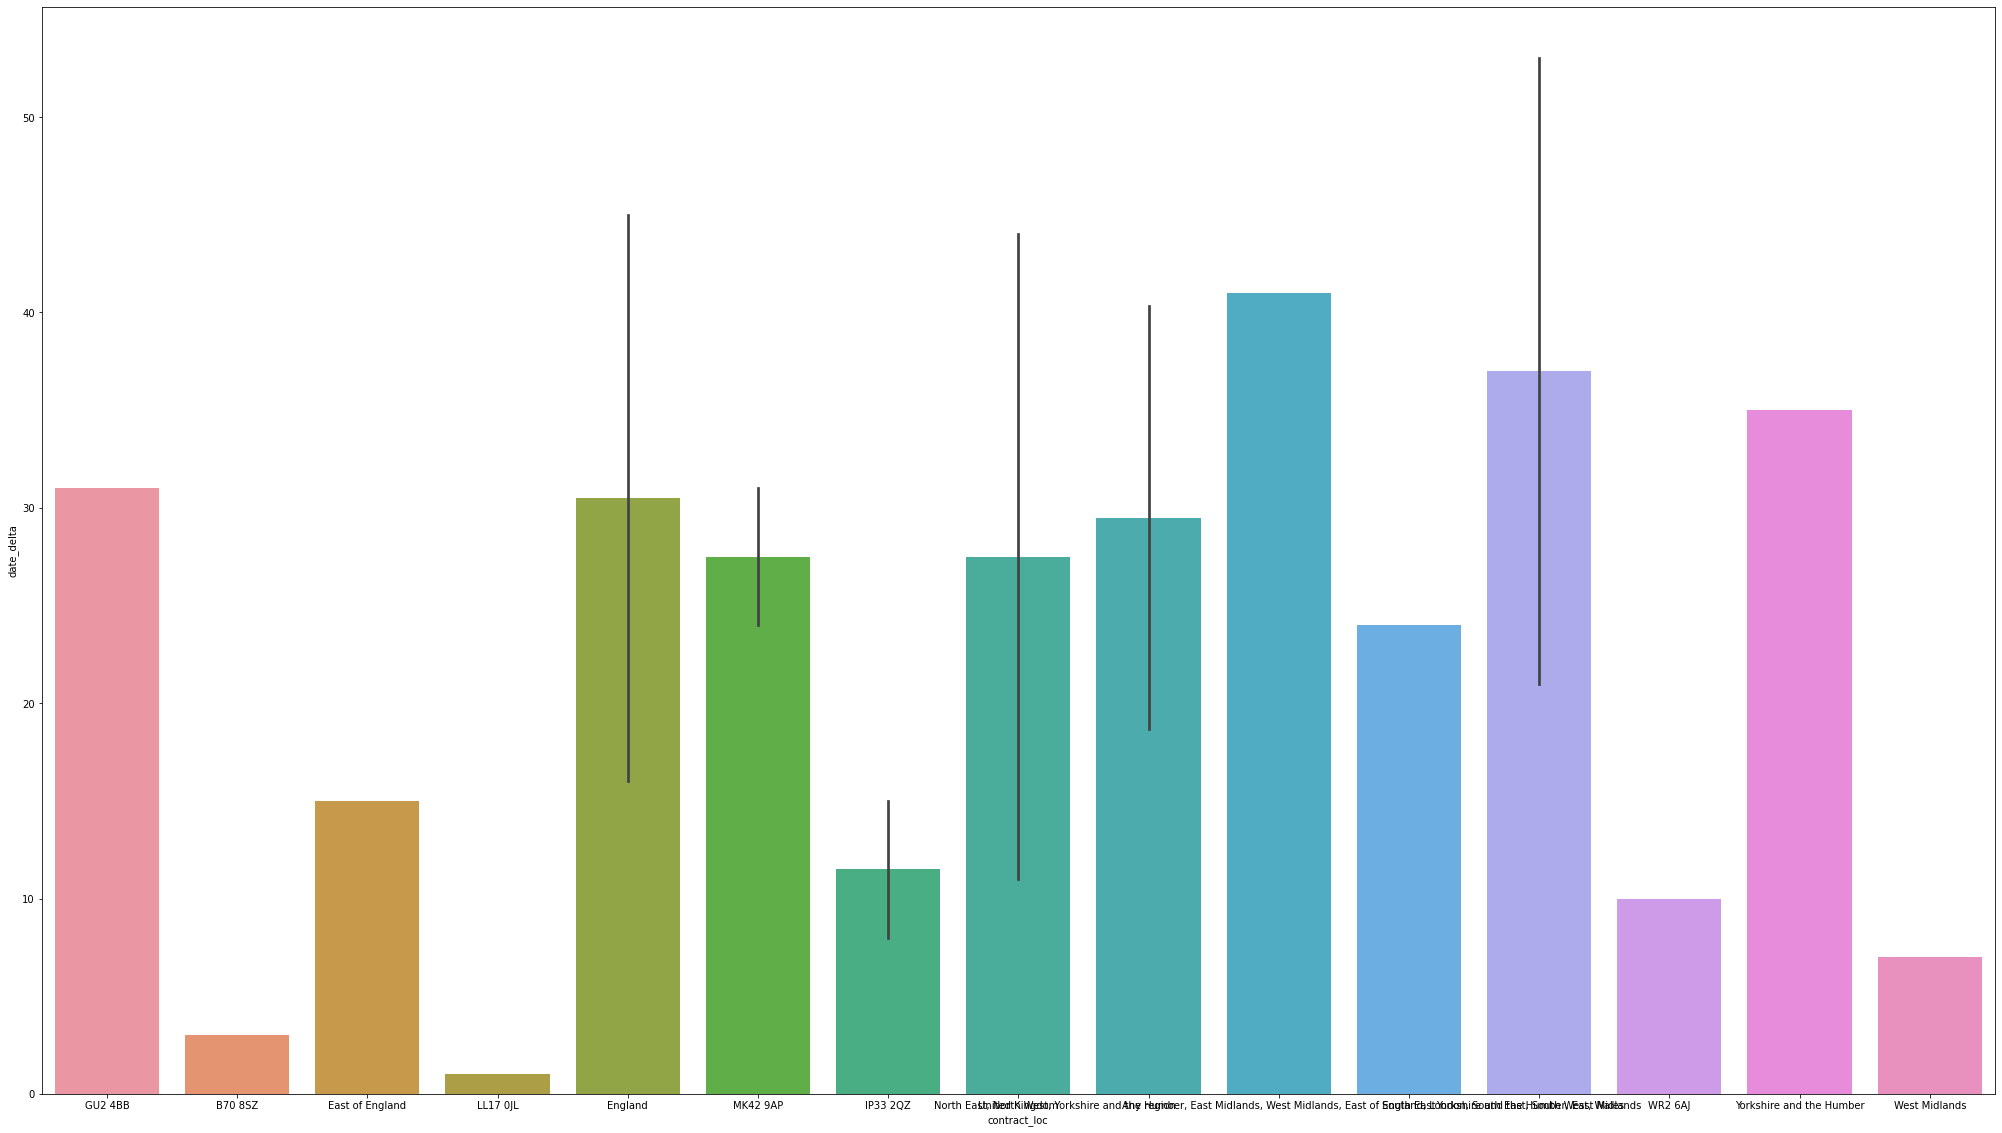

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, ax = plt.subplots(figsize=(35,20))
sns.barplot(x=df_new['contract_loc'],y=df_new['date_delta'], data=df_new, ax=ax)

#### Bar plot plotted with location of contractors and time allocation per days for submiting the documunts before closure. WestMidlands is having the mximum days for submission whereas LL17 0JL having lowest days for submission.

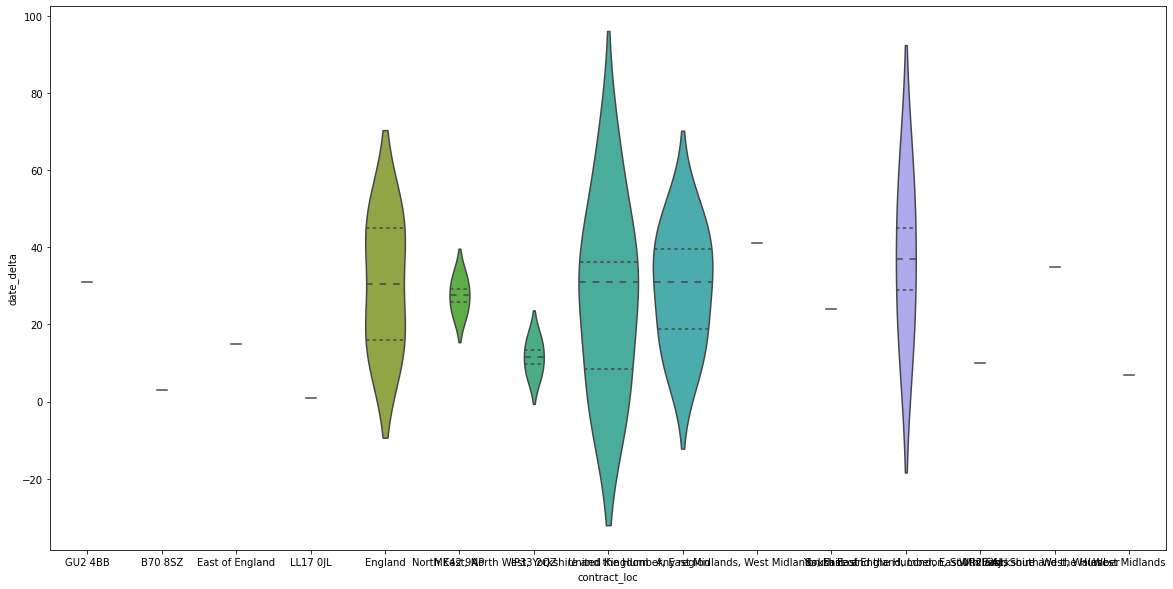

In [87]:
y=df_new['date_delta']
x=df_new['contract_loc']
#x_ticks=df_new['contract_val']
fig, ax = plt.subplots(figsize=(20, 10))
sns.violinplot( x,y, data=df_new,ax=ax, split=True,
                    scale="count", inner="quartile")
plt.show()

#### Violin plot plotted against contract valuation and contract location. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. The representation of the violin shows the inner quartiles of the data also. It is showing the valuation in unevenly spread or biased. ####

## *******************************************************************************##